# CE888 Assignment 1 for Demo

This code is written to demonstarte data analysis made for ce888 assignment 1.

**Author**          : Tomoko Ayakawa<br> 
**Created on**      : 5 February 2019<br> 
**Last modified on**: 19 February 2019<br> 

In [12]:
# import open source libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys

# import original libraries
sys.path.append("../")

import assignment1_main as MAIN
import load_data as DATA
import histogram as HST
import correlation as CRRL
import pca as PCA
import classifier as CLS
import feature_importance as IMP

## 1. Load Data
Load data from **data** directory.<br>
Reading and preprocessing data into pandas.DataFrame are done by respective python files.<br>
#### Returned variables<br>
>`col_names` : List --- Name of the columns (including target column)<br>
`features_df` : DataFrame --- Feature values<br>
`targets_df` : DataFrame --- Target values<br>
`data_df` : DataFrame --- The whole data containing both features and targets<br>
`pic_file`: String --- Prefix for file name (data name + timestamp)<br>
`unique_labels` : List --- Column haeders containing feature names and terget name ("Class")
>

#### Select data to load (Argument `data_id`)
> 0. Human Activity
1. Spam
2. Phishing
>

In [13]:
data_id = int(input("Select the data to load (0: human activity, 1: spam, 2: phishing): "))

col_names, features_df, targets_df, data_df, pic_file = DATA.load_data(data_id=data_id)
unique_labels = DATA.verify_data(data_df, targets_df)
data_df.head(5)

Select the data to load (0: human activity, 1: spam, 2: phishing): 0


./sub\load_data.py:52: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data_df = data_df.convert_objects(convert_numeric=True)


Number of NaN: 0
Data shape:  (7352, 562)
Target labels: ['1' '2' '3' '4' '5' '6']
The range of features:                                                 Max       Min
1_tBodyAcc-mean()-X                       1.000000 -1.000000
2_tBodyAcc-mean()-Y                       1.000000 -1.000000
3_tBodyAcc-mean()-Z                       1.000000 -1.000000
4_tBodyAcc-std()-X                        1.000000 -1.000000
5_tBodyAcc-std()-Y                        0.916238 -0.999873
6_tBodyAcc-std()-Z                        1.000000 -1.000000
7_tBodyAcc-mad()-X                        1.000000 -1.000000
8_tBodyAcc-mad()-Y                        0.967664 -1.000000
9_tBodyAcc-mad()-Z                        1.000000 -1.000000
10_tBodyAcc-max()-X                       1.000000 -1.000000
11_tBodyAcc-max()-Y                       1.000000 -1.000000
12_tBodyAcc-max()-Z                       1.000000 -1.000000
13_tBodyAcc-min()-X                       1.000000 -1.000000
14_tBodyAcc-min()-Y                    

,1_tBodyAcc-mean()-X,2_tBodyAcc-mean()-Y,3_tBodyAcc-mean()-Z,4_tBodyAcc-std()-X,5_tBodyAcc-std()-Y,6_tBodyAcc-std()-Z,7_tBodyAcc-mad()-X,8_tBodyAcc-mad()-Y,9_tBodyAcc-mad()-Z,10_tBodyAcc-max()-X,...,553_fBodyBodyGyroJerkMag-skewness(),554_fBodyBodyGyroJerkMag-kurtosis(),"555_angle(tBodyAccMean,gravity)","556_angle(tBodyAccJerkMean),gravityMean)","557_angle(tBodyGyroMean,gravityMean)","558_angle(tBodyGyroJerkMean,gravityMean)","559_angle(X,gravityMean)","560_angle(Y,gravityMean)","561_angle(Z,gravityMean)",Class
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


## 2. Analyse the Data

### 2-1. Data Structure
#### (1) Feature distribution

In [ ]:
HST.histogram(data_df[data_df.columns[:-1]], pic_file, "_features")

#### (2) Target distribution

In [ ]:
HST.histogram(data_df[data_df.columns[-1:]], pic_file, "_targets")

#### (3) Correlation among features

In [ ]:
cr_np = CRRL.correlation(data_df)
CRRL.cr_heatmap (cr_np, pic_file, col_names)

### 2-2. Feature importance
#### (1) Correlation with the target

In [ ]:
cr_np = CRRL.correlation(data_df)
CRRL.cr_bar_graph (cr_np, pic_file, col_names)

In [ ]:
cr_np_class = cr_np[-1][:-1]
abscr=(abs(cr_np_class))
len(abscr[abscr>0.8])

#### (2) Feature Importance based on Decision Tree

In [ ]:
clf = CLS.train (features_df, targets_df, 0)[-1]
IMP.feature_importance(clf, col_names, pic_file, pic_file.split("_")[0])

### 2-3. Principal Component Analysis (PCA)

#### (1) Plot the data in 3D

<IPython.core.display.Javascript object>


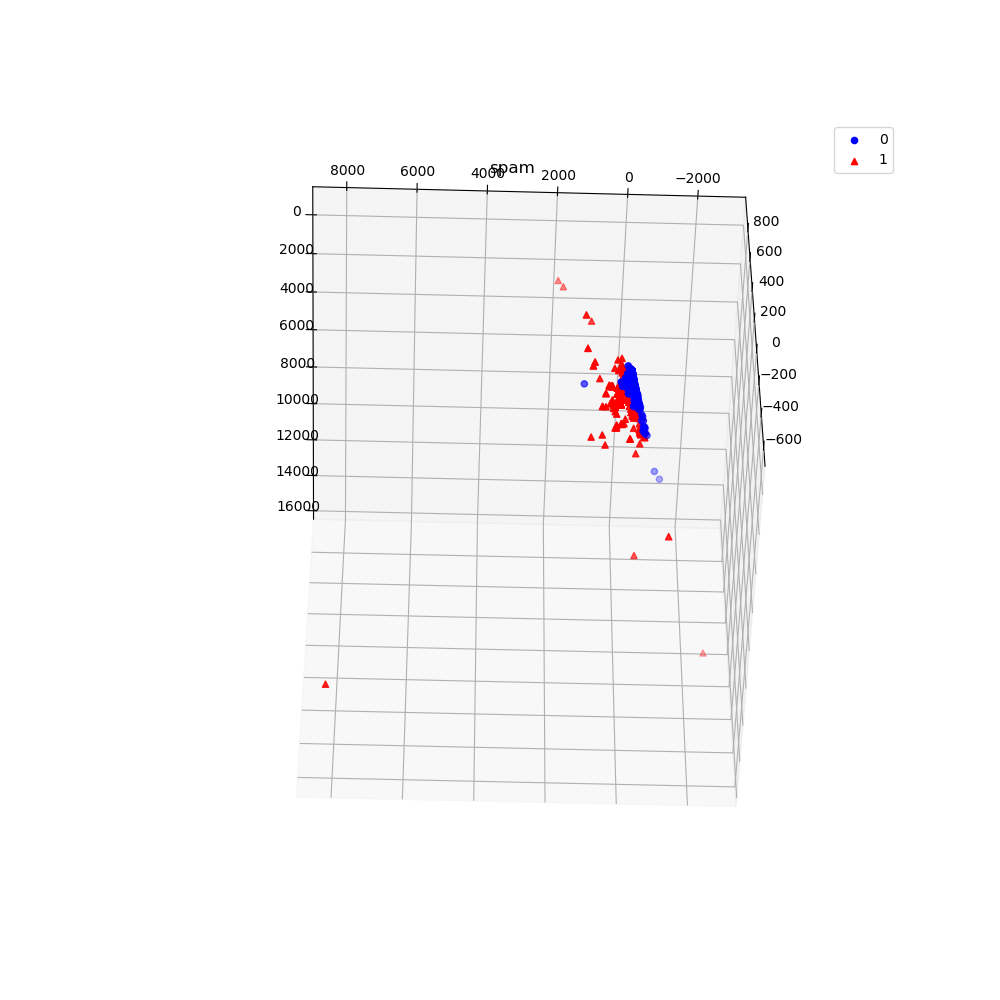

In [3]:
%matplotlib notebook
PCA.pca(features_df, targets_df, unique_labels, pic_file)

#### (2) Explained Variance

In [ ]:
%matplotlib inline
PCA.variance(features_df, pic_file)

### 2-4. Classification with small training data
#### Obtain minimal size data

In [18]:
X, y = MAIN.get_minimal_data(features_df.values, targets_df.values)
X, y = features_df.values, targets_df.values

ratio: 0.4320729053318824
Minimul size of the data for 561 features: 4538
The size of the data used for classification: 3177


#### (1) Decision Tree

In [ ]:
title = "%s_Decision_Tree" % pic_file.split("_")[0]
true_label, pred_label, clf = CLS.train (X, y, 0)
CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "Decision_Tree")
clf

#### (2) Naive Bayes

<IPython.core.display.Javascript object>


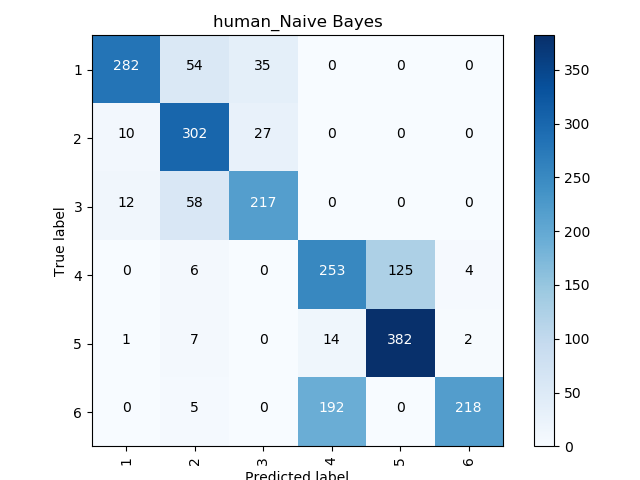

             precision    recall  f1-score   support

          1       0.92      0.76      0.83       371
          2       0.70      0.89      0.78       339
          3       0.78      0.76      0.77       287
          4       0.55      0.65      0.60       388
          5       0.75      0.94      0.84       406
          6       0.97      0.53      0.68       415

avg / total       0.78      0.75      0.75      2206



GaussianNB(priors=None)

In [19]:
title = "%s_Naive Bayes" % pic_file.split("_")[0]
true_label, pred_label, clf = CLS.train (X, y, 1)
CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "Naive Bayes")
clf

#### (3) SVM

In [ ]:
title = "%s_SVM" % pic_file.split("_")[0]
true_label, pred_label, clf = CLS.train (X, y, 2)
CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "SVM")
clf